In [1]:
import requests

# Parsing HTML
from bs4 import BeautifulSoup

# File system management
import os

In [2]:
base_url = 'https://dumps.wikimedia.org/enwiki/'
index = requests.get(base_url).text
soup_index = BeautifulSoup(index, 'html.parser')

# Find the links that are dates of dumps
dumps = [a['href'] for a in soup_index.find_all('a') if 
         a.has_attr('href')]
dumps

['../',
 '20180901/',
 '20180920/',
 '20181001/',
 '20181020/',
 '20181101/',
 '20181120/',
 '20181201/',
 'latest/']

In [3]:
dump_url = base_url + '20180901/'

# Retrieve the html
dump_html = requests.get(dump_url).text
dump_html[:10]

'<!DOCTYPE '

In [4]:
# Convert to a soup
soup_dump = BeautifulSoup(dump_html, 'html.parser')

# Find li elements with the class file
soup_dump.find_all('li', {'class': 'file'}, limit = 10)[:4]

[<li class="file"><a href="/enwiki/20180901/enwiki-20180901-pages-articles-multistream.xml.bz2">enwiki-20180901-pages-articles-multistream.xml.bz2</a> 15.2 GB</li>,
 <li class="file"><a href="/enwiki/20180901/enwiki-20180901-pages-articles-multistream-index.txt.bz2">enwiki-20180901-pages-articles-multistream-index.txt.bz2</a> 195.6 MB</li>,
 <li class="file"><a href="/enwiki/20180901/enwiki-20180901-pages-meta-history1.xml-p10p2101.7z">enwiki-20180901-pages-meta-history1.xml-p10p2101.7z</a> 320.6 MB</li>,
 <li class="file"><a href="/enwiki/20180901/enwiki-20180901-pages-meta-history1.xml-p2102p4148.7z">enwiki-20180901-pages-meta-history1.xml-p2102p4148.7z</a> 310.5 MB</li>]

In [5]:

files = []

# Search through all files
for file in soup_dump.find_all('li', {'class': 'file'}):
    text = file.text
    # Select the relevant files
    if 'pages-articles' in text:
        files.append((text.split()[0], text.split()[1:]))
        
files[:5]

[('enwiki-20180901-pages-articles-multistream.xml.bz2', ['15.2', 'GB']),
 ('enwiki-20180901-pages-articles-multistream-index.txt.bz2', ['195.6', 'MB']),
 ('enwiki-20180901-pages-articles.xml.bz2', ['14.3', 'GB']),
 ('enwiki-20180901-pages-articles1.xml-p10p30302.bz2', ['165.3', 'MB']),
 ('enwiki-20180901-pages-articles2.xml-p30304p88444.bz2', ['195.8', 'MB'])]

In [6]:
files_to_download = [file[0] for file in files if '.xml-p' in file[0]]
files_to_download[-5:]

['enwiki-20180901-pages-articles27.xml-p51663464p53163464.bz2',
 'enwiki-20180901-pages-articles27.xml-p53163464p54663464.bz2',
 'enwiki-20180901-pages-articles27.xml-p54663464p56163464.bz2',
 'enwiki-20180901-pages-articles27.xml-p56163464p57663464.bz2',
 'enwiki-20180901-pages-articles27.xml-p57663464p58360959.bz2']

In [7]:
import sys
from keras.utils import get_file

Using TensorFlow backend.


In [8]:
#files_to_download

In [9]:
#get_file('C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/enwiki-20181120-pages-articles1.xml-p10p30302.bz2',dump_url)

In [10]:
keras_home='C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/'

In [11]:

data_paths = []
file_info = []

# Iterate through each file
for file in files_to_download:
    path = keras_home+file
    
    # Check to see if the path exists (if the file is already downloaded)
    if not os.path.exists(file):
        print('Downloading')
        # If not, download the file
        data_paths.append(get_file(path, dump_url+'/'+file))
        # Find the file size in MB
        file_size = os.stat(path).st_size / 1e3
        
        # Find the number of articles
        file_articles = int(file.split('p')[-1].split('.')[-2]) - int(file.split('p')[-2])
        file_info.append((file, file_size, file_articles))
        
    # If the file is already downloaded find some information
    else:
        data_paths.append(path)
        # Find the file size in MB
        file_size = os.stat(path).st_size / 1e3
        
        # Find the number of articles
        file_number = int(file.split('p')[-1].split('.')[-2]) - int(file.split('p')[-2])
        file_info.append((file.split('-')[-1], file_size, file_number))

Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading
Downloading


In [12]:
sorted(file_info, key = lambda x: x[1], reverse = True)[:5]

[('enwiki-20180901-pages-articles14.xml-p6197599p7697599.bz2',
  397133.836,
  1500000),
 ('enwiki-20180901-pages-articles12.xml-p3926864p5040435.bz2',
  396765.417,
  1113571),
 ('enwiki-20180901-pages-articles13.xml-p5040438p6197593.bz2',
  390834.855,
  1157155),
 ('enwiki-20180901-pages-articles11.xml-p3046517p3926861.bz2',
  383739.076,
  880344),
 ('enwiki-20180901-pages-articles15.xml-p7744803p9244803.bz2',
  374264.421,
  1500000)]

In [13]:
sorted(file_info, key = lambda x: x[2], reverse = True)[:5]

[('enwiki-20180901-pages-articles14.xml-p6197599p7697599.bz2',
  397133.836,
  1500000),
 ('enwiki-20180901-pages-articles15.xml-p7744803p9244803.bz2',
  374264.421,
  1500000),
 ('enwiki-20180901-pages-articles16.xml-p9518059p11018059.bz2',
  310012.6,
  1500000),
 ('enwiki-20180901-pages-articles17.xml-p11539268p13039268.bz2',
  369371.949,
  1500000),
 ('enwiki-20180901-pages-articles18.xml-p13693075p15193075.bz2',
  352199.415,
  1500000)]

In [14]:
print(f'There are {len(file_info)} partitions.')

There are 55 partitions.


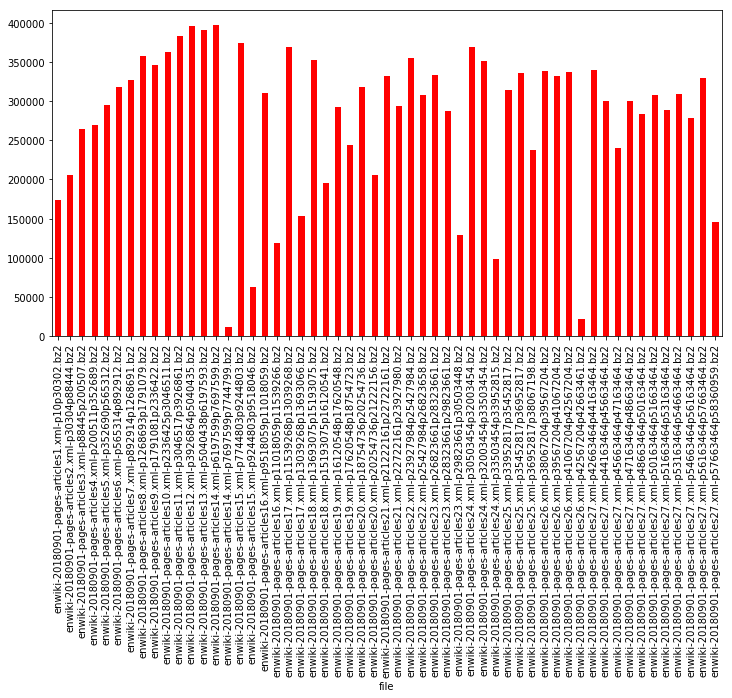

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
file_df = pd.DataFrame(file_info, columns = ['file', 'size (MB)', 'articles']).set_index('file')
file_df['size (MB)'].plot.bar(color = 'red', figsize = (12, 6));

In [16]:
print(f"The total size of files on disk is {file_df['size (MB)'].sum() / 1e6} GB")

The total size of files on disk is 15.398009268 GB


In [17]:
import bz2
import subprocess

data_path = data_paths[15]
data_path

'C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/enwiki-20180901-pages-articles15.xml-p7744803p9244803.bz2'

In [18]:
%%timeit -n 3 -r 3

lines = []
for i, line in enumerate(bz2.BZ2File(data_path, 'r')):
    lines.append(line)
    if i > 1e6:
        break

4.78 s ± 124 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [19]:
data_path

'C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/enwiki-20180901-pages-articles15.xml-p7744803p9244803.bz2'

In [20]:
#bzcat is not working!

In [21]:
lines = []

for i, line in enumerate(bz2.BZ2File(data_path, 'r')):
    lines.append(line)
    if i > 5e5:
        break
        
lines[-165:-109]

[b'  <page>\n',
 b'    <title>Carroll Knicely</title>\n',
 b'    <ns>0</ns>\n',
 b'    <id>7772446</id>\n',
 b'    <revision>\n',
 b'      <id>850825914</id>\n',
 b'      <parentid>819310247</parentid>\n',
 b'      <timestamp>2018-07-18T05:43:30Z</timestamp>\n',
 b'      <contributor>\n',
 b'        <username>Ser Amantio di Nicolao</username>\n',
 b'        <id>753665</id>\n',
 b'      </contributor>\n',
 b'      <comment>/* External links */add authority control, test using [[Project:AWB|AWB]]</comment>\n',
 b'      <model>wikitext</model>\n',
 b'      <format>text/x-wiki</format>\n',
 b'      <text xml:space="preserve">\'\'\'Carroll F. Knicely\'\'\' (born c. 1929 in [[Staunton, Virginia]] - died November 2, 2006 in [[Glasgow, Kentucky]]) was [[Editing|editor]] and [[Publishing|publisher]] of the \'\'[[Glasgow Daily Times]]\'\' for nearly 20 years (and later, its owner) and served under three [[Governor of Kentucky|Kentucky Governors]] as commissioner and later Commerce Secretary.\n',

In [22]:
import xml.sax

class WikiXmlHandler(xml.sax.handler.ContentHandler):
    """Content handler for Wiki XML data using SAX"""
    def __init__(self):
        xml.sax.handler.ContentHandler.__init__(self)
        self._buffer = None
        self._values = {}
        self._current_tag = None
        self._pages = []

    def characters(self, content):
        """Characters between opening and closing tags"""
        if self._current_tag:
            self._buffer.append(content)

    def startElement(self, name, attrs):
        """Opening tag of element"""
        if name in ('title', 'text', 'timestamp'):
            self._current_tag = name
            self._buffer = []

    def endElement(self, name):
        """Closing tag of element"""
        if name == self._current_tag:
            self._values[name] = ' '.join(self._buffer)

        if name == 'page':
            self._pages.append((self._values['title'], self._values['text']))

In [23]:
# Content handler for Wiki XML
handler = WikiXmlHandler()

# Parsing object
parser = xml.sax.make_parser()
parser.setContentHandler(handler)

handler._pages

[]

In [24]:
for l in lines[-165:-109]:
    parser.feed(l)

In [25]:
handler._pages

[('Carroll Knicely',
  "'''Carroll F. Knicely''' (born c. 1929 in [[Staunton, Virginia]] - died November 2, 2006 in [[Glasgow, Kentucky]]) was [[Editing|editor]] and [[Publishing|publisher]] of the ''[[Glasgow Daily Times]]'' for nearly 20 years (and later, its owner) and served under three [[Governor of Kentucky|Kentucky Governors]] as commissioner and later Commerce Secretary. \n \n ==Career in publishing== \n Knicely started out as an [[apprentice]] [[Linotype machine|linotype]] operator at ''[[The News-Virginian]]''.  In 1957, he relocated to [[Glasgow, Kentucky]] as the president, editor and publisher of the ''Glasgow Daily Times''.  In 1963, Knicely and his wife Evely became the sole owners of the newspaper and of the Glasgow Publishing Corporation.  He also held interests in several newspapers all over [[Kentucky]] and was part owner of a weekly newspaper in [[Westmoreland, Tennessee]]. \n \n Knicely served as president of the Kentucky Press Association and president of the Kent

In [26]:
# Object for handling xml
handler = WikiXmlHandler()

# Parsing object
parser = xml.sax.make_parser()
parser.setContentHandler(handler)

for i, line in enumerate(bz2.BZ2File(data_path, 'r')):
    parser.feed(line)
    
    # Stop when 3 articles have been found
    if len(handler._pages) > 50:
        break
        
print([x[0] for x in handler._pages])

['Zhou Wei Hui', 'Fred Jones (fictional character)', 'Sosnovski Raion', 'Sosnovskii Raion', 'Lucas brothers, builders', 'Jane Eire', 'KENZ (FM)', 'Prehibernation Week', 'Interactive Picture Systems', 'File:Saint Marie v1.jpg', 'Desert (dance music act)', 'Digimortal', 'Sosnovsky', 'Monaco at the 1952 Summer Olympics', 'Kazachok', 'Living on a Knife Edge', 'Lost Chances', 'Psychosonia', 'Sosnovskiy', 'Streets of Fear', 'Urith of Chittlehampton', 'Primatte', 'Sosnovski', 'Virgin of the World', 'Urith', 'Sosnovskii', 'Rocky Paths', 'General Güemes, Salta', 'San Fabiano', 'Mubarak Peace Bridge', 'Henry Vaughan (Architect)', 'Detroit Yacht Club', 'Damage of Life', 'DYC', 'Experiment With Destiny', 'Template:Nations at the 1952 Summer Olympics', 'Story taler', 'Fall of Earth City', 'Story taller', 'Identimate', 'Joker at the Gate', 'Wikipedia:Articles for deletion/Skeet (slang)', 'Light Specific Data', 'Looking in the Future', 'No. 22 Group RAF', 'Mists of Meridin', 'Nuclear Drive', 'Arturo 

In [27]:
import mwparserfromhell 

print(handler._pages[6][0])

# Create the wiki article
wiki = mwparserfromhell.parse(handler._pages[6][1])

KENZ (FM)


In [28]:
print(type(wiki))
wiki[:100]

<class 'mwparserfromhell.wikicode.Wikicode'>


'{{Infobox radio station \n  | name = KENZ \n  | image = File:KENZ_949_Logo_2017.png \n  | city = [[Prov'

In [29]:
wikilinks = [x.title for x in wiki.filter_wikilinks()]
print(f'There are {len(wikilinks)} wikilinks.')
wikilinks[:5]

There are 56 wikilinks.


['Provo, Utah', 'Wasatch Front', 'Megahertz', 'Contemporary hit radio', 'watt']

In [30]:
wiki.filter_arguments()

[]

In [31]:
wiki.filter_comments()

[]

In [32]:
external_links = [(x.title, x.url) for x in wiki.filter_external_links()]
print(f'There are {len(external_links)} external links.')
external_links[:5]

There are 13 external links.


[(None, 'http://www.powerslc.com'),
 ('powerslc.com', 'http://www.powerslc.com'),
 (None, 'http://www.fcc.gov/fcc-bin/fmq?call=KENZ'),
 (None, 'http://www1.arbitron.com/sip/displaySip.do?surveyID=SU08'),
 ('Salt Lake Broadcasting History',
  'http://www.oldradio.com/archives/stations/slc-hist.htm')]

In [33]:
contemporary = wiki.filter(matches = 'contemporary')
contemporary[1], type(contemporary[1])

('[[Contemporary hit radio|Top 40 (CHR)]]',
 mwparserfromhell.nodes.wikilink.Wikilink)

In [34]:
wiki.strip_code().strip()[:100]

'KENZ (94.9 FM,  " Power 94.9 " ) is a top 40/CHR radio station broadcasting to Salt Lake City, Utah '

In [35]:
templates = wiki.filter_templates()
print(f'There are {len(templates)} templates.')
for template in templates:
    print(template.name)

There are 14 templates.
Infobox radio station 
  
coord
listen live
cite web
cite web
cite web
dead link
cite news
Reflist
FM station data
Salt Lake City Radio
Contemporary Hit Radio Stations in Utah
Cumulus Media
Provo, Utah


In [36]:
infobox = wiki.filter_templates(matches = 'Infobox radio station')[0]
infobox

"{{Infobox radio station \n  | name = KENZ \n  | image = File:KENZ_949_Logo_2017.png \n  | city = [[Provo, Utah]] \n  | area = north/central Utah, most of [[Wasatch Front]]  \n  | branding = ''Power 94.9'' \n  | slogan = Utah's New Hit Music \n  | frequency = 94.9 [[Megahertz|MHz]] \n  | airdate = 1981 (as KLRZ) \n  | format = [[Contemporary hit radio|Top 40 (CHR)]]  \n  | erp = 48,000 [[watt]]s \n  | haat = 853 meters (atop [[Lake Mountain (Utah)|Lake Mountain]]) \n  | class = C \n  | facility_id = 6545 \n  | coordinates = {{coord|40|16|58|N|111|56|11|W|region:US_type:landmark}}  \n  | callsign_meaning =  \n  | former_callsigns =KLRZ (1981-1986) < br > KBNG (1986-1987) < br > KTOU (1987-1989) < br > KZHT (1989-2004) < br > KPHT (1/6/2004-1/16/2004) < br > KMXU (1/16/2004-1/27/2004) < br > KHTB (2004-2015) \n  | affiliations = \n  | owner = [[Cumulus Media]] \n  | licensee = Radio License Holding CBC, LLC \n  | sister_stations = [[KBEE]], [[KBER]], [[KHTB]], [[KRRF]], [[KKAT (AM)|KKAT]

In [37]:
information = {param.name.strip_code().strip(): param.value.strip_code().strip() for param in infobox.params}
information

{'name': 'KENZ',
 'image': 'File:KENZ_949_Logo_2017.png',
 'city': 'Provo, Utah',
 'area': 'north/central Utah, most of Wasatch Front',
 'branding': 'Power 94.9',
 'slogan': "Utah's New Hit Music",
 'frequency': '94.9 MHz',
 'airdate': '1981 (as KLRZ)',
 'format': 'Top 40 (CHR)',
 'erp': '48,000 watts',
 'haat': '853 meters (atop Lake Mountain)',
 'class': 'C',
 'facility_id': '6545',
 'coordinates': '',
 'callsign_meaning': '',
 'former_callsigns': 'KLRZ (1981-1986) < br > KBNG (1986-1987) < br > KTOU (1987-1989) < br > KZHT (1989-2004) < br > KPHT (1/6/2004-1/16/2004) < br > KMXU (1/16/2004-1/27/2004) < br > KHTB (2004-2015)',
 'affiliations': '',
 'owner': 'Cumulus Media',
 'licensee': 'Radio License Holding CBC, LLC',
 'sister_stations': 'KBEE, KBER, KHTB, KRRF, KKAT, KUBL-FM',
 'webcast': '',
 'website': 'powerslc.com'}

In [38]:
import re

def process_article(title, text, timestamp, template = 'Infobox book'):
    """Process a wikipedia article looking for template"""
    
    # Create a parsing object
    wikicode = mwparserfromhell.parse(text)
    
    # Search through templates for the template
    matches = wikicode.filter_templates(matches = template)
    
    # Filter out errant matches
    matches = [x for x in matches if x.name.strip_code().strip().lower() == template.lower()]
    
    if len(matches) >= 1:
        # template_name = matches[0].name.strip_code().strip()

        # Extract information from infobox
        properties = {param.name.strip_code().strip(): param.value.strip_code().strip() 
                      for param in matches[0].params
                      if param.value.strip_code().strip()}

        # Extract internal wikilinks
        wikilinks = [x.title.strip_code().strip() for x in wikicode.filter_wikilinks()]

        # Extract external links
        exlinks = [x.url.strip_code().strip() for x in wikicode.filter_external_links()]

        # Find approximate length of article
        text_length = len(wikicode.strip_code().strip())

        return (title, properties, wikilinks, exlinks, timestamp, text_length)

In [39]:
r = process_article('KENZ (FM)', wiki, None)
r

In [40]:
r = process_article('KENZ (FM)', wiki, None, template = 'Infobox radio station')
r[0], r[1]

('KENZ (FM)',
 {'name': 'KENZ',
  'image': 'File:KENZ_949_Logo_2017.png',
  'city': 'Provo, Utah',
  'area': 'north/central Utah, most of Wasatch Front',
  'branding': 'Power 94.9',
  'slogan': "Utah's New Hit Music",
  'frequency': '94.9 MHz',
  'airdate': '1981 (as KLRZ)',
  'format': 'Top 40 (CHR)',
  'erp': '48,000 watts',
  'haat': '853 meters (atop Lake Mountain)',
  'class': 'C',
  'facility_id': '6545',
  'former_callsigns': 'KLRZ (1981-1986) < br > KBNG (1986-1987) < br > KTOU (1987-1989) < br > KZHT (1989-2004) < br > KPHT (1/6/2004-1/16/2004) < br > KMXU (1/16/2004-1/27/2004) < br > KHTB (2004-2015)',
  'owner': 'Cumulus Media',
  'licensee': 'Radio License Holding CBC, LLC',
  'sister_stations': 'KBEE, KBER, KHTB, KRRF, KKAT, KUBL-FM',
  'website': 'powerslc.com'})

In [41]:
class WikiXmlHandler(xml.sax.handler.ContentHandler):
    """Parse through XML data using SAX"""
    def __init__(self):
        xml.sax.handler.ContentHandler.__init__(self)
        self._buffer = None
        self._values = {}
        self._current_tag = None
        self._books = []
        self._article_count = 0
        self._non_matches = []

    def characters(self, content):
        """Characters between opening and closing tags"""
        if self._current_tag:
            self._buffer.append(content)

    def startElement(self, name, attrs):
        """Opening tag of element"""
        if name in ('title', 'text', 'timestamp'):
            self._current_tag = name
            self._buffer = []

    def endElement(self, name):
        """Closing tag of element"""
        if name == self._current_tag:
            self._values[name] = ' '.join(self._buffer)

        if name == 'page':
            self._article_count += 1
            # Search through the page to see if the page is a book
            book = process_article(**self._values, template = 'Infobox book')
            # Append to the list of books
            if book:
                self._books.append(book)

In [42]:
# Object for handling xml
handler = WikiXmlHandler()

# Parsing object
parser = xml.sax.make_parser()
parser.setContentHandler(handler)

for i, line in enumerate(bz2.BZ2File(data_path, 'r')):
    parser.feed(line)
    
    # Stop when 3 articles have been found
    if len(handler._books) > 2:
        break
        
print(f'Searched through {handler._article_count} articles to find 3 books.')

Searched through 1974 articles to find 3 books.


In [43]:
handler._books[0]

('The Cambridge Dictionary of Philosophy',
 {'1': '< !-- See Wikipedia:WikiProject_Books -- >',
  'name': 'The Cambridge Dictionary of Philosophy',
  'image': 'File:The Cambridge Dictionary of Philosophy (first edition).jpg',
  'caption': 'Cover of the first edition',
  'editor': 'Robert Audi',
  'country': 'United Kingdom',
  'language': 'English',
  'subject': 'Philosophy',
  'publisher': 'Cambridge University Press',
  'pub_date': '1995',
  'media_type': 'Print (Hardcover and Paperback)',
  'pages': '1001 (second edition)',
  'isbn': '0-521-63722-8',
  'isbn_note': '(second edition)'},
 ['Robert Audi',
  'Philosophy',
  'Cambridge University Press',
  'Hardcover',
  'Paperback',
  'dictionary',
  'philosophy',
  'Cambridge University Press',
  'Robert Audi',
  'Category:1995 books',
  'Category:Cambridge University Press books',
  'Category:Dictionaries of philosophy',
  'Category:Encyclopedias of philosophy',
  'Category:English-language books'],
 ['http://www.cambridge.org/uk/cata

In [44]:
# Uncompress the file if not already uncompressed
if not os.path.exists('C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/p15.xml'):
    file=bz2.BZ2File('C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/enwiki-20180901-pages-articles15.xml-p7744803p9244803.bz2').read()
    open('C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/p15.xml','wb').write(file)
else:
    print('Already uncompressed')

Already uncompressed


In [45]:
#I will not run cell 43, 44 and 45 for now!

In [46]:
import gc
import json

In [47]:
d='C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/wiki/enwiki-20180901-pages-articles1.xml-p10p30302.bz2'

In [48]:
c = "C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/wiki/enwiki-20180901-pages-articles14.xml-p7697599p7744799.bz2"

In [49]:
def find_books(data_path, limit = None, save = True):
    """Find all the book articles from a compressed wikipedia XML dump.
       `limit` is an optional argument to only return a set number of books.
        If save, books are saved to partition directory based on file name"""

    # Object for handling xml
    handler = WikiXmlHandler()

    # Parsing object
    parser = xml.sax.make_parser()
    parser.setContentHandler(handler)

    # Iterate through compressed file
    for i, line in enumerate(bz2.BZ2File(data_path, 'r')):
        try:
            parser.feed(line)
        except StopIteration:
            break
            
        # Optional limit
        if limit is not None and len(handler._books) >= limit:
            return handler._books
    
    if save:
        partition_dir = 'C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/wiki/partitions/'
        # Create file name based on partition name
        p_str = data_path.split('-')[-1].split('.')[-2]
        out_dir = partition_dir + f'{p_str}.json'

        # Open the file
        with open(out_dir, 'w') as fout:
            # Write as json
            for book in handler._books:
                fout.write(json.dumps(book) + '\n')
        
        print(f'{len(os.listdir(partition_dir))} files processed.', end = '\r')

    # Memory management
    del handler
    del parser
    gc.collect()
    return None

In [50]:
find_books(c)

In [50]:
partitions = ['C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/wiki/' + file for file in os.listdir('C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/wiki') if 'xml-p' in file]
len(partitions), partitions

(1,
 ['C:/Users/raksh/Desktop/Fall 2018/Big Data-Nick brown/Big-Data-Intelligence-and-Analytics-/Recommendation System for Wikipedia/Data/wiki/enwiki-20180901-pages-articles1.xml-p10p30302.bz2'])

In [51]:
from multiprocessing import Pool 
# import tqdm 

# # List of lists to single list
# from itertools import chain

# # Sending keyword arguments in map
# from functools import partial

In [52]:
os.cpu_count()

4

In [53]:
from timeit import default_timer as timer
# Create a pool of workers to execute processes


In [54]:
start = timer()
start

230.4439641022151

In [55]:
# Map (service, tasks), applies function to each partition
tempList = [c]
if __name__ == '__main__':
    pool = Pool(processes = 1)
    results = pool.map(find_books, range(3))
    pool.start()
    pool.join()    
    pool.close()

TypeError: map() got an unexpected keyword argument 'target'

In [ ]:
pool.close()
pool.join()

end = timer()
print(f'{end - start} seconds elapsed.')